In [53]:
import numpy as np
import pandas as pd

train_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/train.csv')
test_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/test.csv')
sub_df = pd.read_csv('C:/Users/user/Desktop/Study/Kaggle/House_prices/Data_Files/sample_submission.csv')

In [54]:
def Outlier(train_df, test_df):
    #Take most(mean) value on year data
    na_year = 'GarageYrBlt'
    index = 1132
    test_df.loc[index, na_year] = test_df[na_year].value_counts().index.tolist()[0]

def NaN(train_df, test_df):
    #Delete features which have over 500 NaN values
    na_train = train_df.isna().sum()
    drop_na_features = na_train[na_train > 500].index.tolist()
    train_df.drop(drop_na_features, axis = 1, inplace = True)
    test_df.drop(drop_na_features, axis = 1, inplace = True)
    
    # Take mean-value on continuous data
    Ct_feature_train = ['MasVnrArea', 'LotFrontage']
    Ct_feature_test = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'MasVnrArea', 'LotFrontage']

    for ele in Ct_feature_train:
        train_df[ele] = train_df[ele].fillna(train_df[ele].mean())
    for ele in Ct_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].mean())

    #Take most(mean) value on rank
    Rk_feature_train = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageQual', 'GarageCond']
    Rk_feature_test = ['BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'KitchenQual']

    for ele in Rk_feature_train:
        train_df[ele] = train_df[ele].fillna(train_df[ele].value_counts().index.tolist()[0])
    for ele in Rk_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])

    #Take most(mean) value on number data
    Nb_feature_test = ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']

    for ele in Nb_feature_test:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])

    #Take most(mean) value on year data
    na_year = 'GarageYrBlt'

    train_df[na_year] = train_df[na_year].fillna(train_df[na_year].value_counts().index.tolist()[0])
    test_df[na_year] = test_df[na_year].fillna(test_df[na_year].value_counts().index.tolist()[0])
    
    #Replace All NaN data
    nan_train_list = ['BsmtExposure', 'GarageType', 'GarageFinish', 'Electrical']
    nan_test_list = ['BsmtExposure', 'GarageType', 'GarageFinish', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']

    for ele in nan_train_list:
        train_df[ele] = train_df[ele].fillna(train_df[ele].value_counts().index.tolist()[0])
    for ele in nan_test_list:
        test_df[ele] = test_df[ele].fillna(test_df[ele].value_counts().index.tolist()[0])
def Encoding(train_df, test_df):
    OHE_list = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']
    Rank_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

    from sklearn.preprocessing import OneHotEncoder
    from sklearn.preprocessing import LabelEncoder

    #Do OHE on category feature
    for ele in OHE_list:
        ohe = OneHotEncoder(sparse_output = False)
        train_ohe = ohe.fit_transform(train_df[ele].values.reshape(-1,1))
        test_ohe = ohe.transform(test_df[ele].values.reshape(-1,1))
        train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)
        test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)

    train_df.drop(OHE_list, axis = 1, inplace = True)
    test_df.drop(OHE_list, axis = 1, inplace = True)


    #Do LaebelEncoding on rank feature
    for ele in Rank_list:
        ohe = LabelEncoder()
        train_ohe = ohe.fit_transform(train_df[ele])
        test_ohe = ohe.transform(test_df[ele])
        train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_label'])], axis = 1)
        test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_label'])], axis = 1)

    train_df.drop(Rank_list, axis = 1, inplace = True)
    test_df.drop(Rank_list, axis = 1, inplace = True)

    df1 = train_df
    df2 = test_df
    return df1, df2

def Drop_Features(train_df, test_df):
    drop_list = ['Id', 'MSSubClass', 'Street', 'PavedDrive', 'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'BsmtFinType2_label']

    train_df.drop(drop_list, axis = 1, inplace = True)
    test_df.drop(drop_list, axis = 1, inplace = True)

def Combine(train_df, test_df):
    # Qual + Cond
    train_df['OverallRank'] = train_df['OverallQual_label'] + train_df['OverallCond_label']
    test_df['OverallRank'] = test_df['OverallQual_label'] + test_df['OverallCond_label']
    train_df['ExterRank'] = train_df['ExterQual_label'] + train_df['ExterCond_label']
    test_df['ExterRank'] = test_df['ExterQual_label'] + test_df['ExterCond_label']
    train_df['BsmtRank'] = train_df['BsmtQual_label'] + train_df['BsmtCond_label']
    test_df['BsmtRank'] = test_df['BsmtQual_label'] + test_df['BsmtCond_label']
    train_df['GarageRank'] = train_df['GarageQual_label'] + train_df['GarageCond_label']
    test_df['GarageRank'] = test_df['GarageQual_label'] + test_df['GarageCond_label']

    # Bath
    train_df['GroundBath'] = train_df['FullBath'] + train_df['HalfBath']
    test_df['GroundBath'] = test_df['FullBath'] + test_df['HalfBath']
    train_df['BsmtBath'] = train_df['BsmtFullBath'] + train_df['BsmtHalfBath']
    test_df['BsmtBath'] = test_df['BsmtFullBath'] + test_df['BsmtHalfBath']

    # Drop
    drop_list = ['OverallQual_label', 'OverallCond_label', 'ExterQual_label', 'ExterCond_label', 'BsmtQual_label', 'BsmtCond_label', 
                 'GarageQual_label', 'GarageCond_label', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
    train_df.drop(drop_list, axis = 1, inplace = True)
    test_df.drop(drop_list, axis = 1, inplace = True)

def Log(train_df, test_df):
    log_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF',
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
    # Do Log Conversion
    for ele in log_list:
        train_df[ele] = np.log1p(train_df[ele])
        test_df[ele] = np.log1p(test_df[ele])

def Log_tr(train_df):
    train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

def Scaling(train_df, test_df):
    scale_list = ['YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'GarageArea', 'YrSold']

    from sklearn.preprocessing import MinMaxScaler

    for ele in scale_list:
        scaler = MinMaxScaler()
        scaler.fit(train_df[ele].values.reshape(-1,1))
        train_df[ele] = scaler.transform(train_df[ele].values.reshape(-1,1))
        test_df[ele] = scaler.transform(test_df[ele].values.reshape(-1,1))

In [61]:
def feature_engineering1(train_df, test_df):
    Outlier(train_df, test_df)
    NaN(train_df, test_df)
    
def feature_engineering2(train_df, test_df):
    Drop_Features(train_df, test_df)
    #Combine(train_df, test_df)
    Log(train_df, test_df)
    Log_tr(train_df)

In [56]:
feature_engineering1(train_df, test_df)

In [57]:
OHE_list = ['MSZoning', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtExposure', 'Heating', 'CentralAir',
                'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']
Rank_list = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 
                 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Do OHE on category feature
for ele in OHE_list:
    ohe = OneHotEncoder(sparse_output = False)
    train_ohe = ohe.fit_transform(train_df[ele].values.reshape(-1,1))
    test_ohe = ohe.transform(test_df[ele].values.reshape(-1,1))
    train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)
    test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_' + i for i in ohe.categories_[0]])], axis = 1)

train_df.drop(OHE_list, axis = 1, inplace = True)
test_df.drop(OHE_list, axis = 1, inplace = True)


#Do LaebelEncoding on rank feature
for ele in Rank_list:
    ohe = LabelEncoder()
    train_ohe = ohe.fit_transform(train_df[ele])
    test_ohe = ohe.transform(test_df[ele])
    train_df = pd.concat([train_df, pd.DataFrame(train_ohe, columns = [ele + '_label'])], axis = 1)
    test_df = pd.concat([test_df, pd.DataFrame(test_ohe, columns = [ele + '_label'])], axis = 1)

train_df.drop(Rank_list, axis = 1, inplace = True)
test_df.drop(Rank_list, axis = 1, inplace = True)

In [58]:
feature_engineering2(train_df, test_df)

In [59]:
# Making Feature and Label for train
Feature = train_df.drop('SalePrice', axis = 1, inplace = False)
Label = train_df['SalePrice']

### **Ridge, Lasso, ElasticNet**

In [99]:
# Ridge / Lasso Regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

ridge_model = Ridge()
lasso_model = Lasso()
elastic_model = ElasticNet()

ridge_score = cross_val_score(ridge_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)
lasso_score = cross_val_score(lasso_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)
elastic_score = cross_val_score(elastic_model, Feature, Label, scoring = 'neg_root_mean_squared_error', cv = 5)

print("튜닝 전 Ridge 모델 RSME :", -np.mean(ridge_score))
print("튜닝 전 Lasso 모델 RSME :", -np.mean(lasso_score))
print("튜닝 전 Elastic 모델 RSME :", -np.mean(elastic_score))

튜닝 전 Ridge 모델 RSME : 0.12793469482651104
튜닝 전 Lasso 모델 RSME : 0.2671096876072842
튜닝 전 Elastic 모델 RSME : 0.2632679429161851


In [97]:
# hyper parameter
parameter1 = {'alpha' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50, 100]}
parameter2 = {'alpha' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 50, 100],
              'l1_ratio' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

In [98]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

ridge_best = GridSearchCV(ridge_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
lasso_best = GridSearchCV(lasso_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
elastic_best = GridSearchCV(elastic_model, param_grid = parameter2, scoring = 'neg_root_mean_squared_error', refit = True)

ridge_best.fit(Feature, Label)
lasso_best.fit(Feature, Label)
elastic_best.fit(Feature, Label)

print("Ridge 모델 최적 파라미터 :", ridge_best.best_params_, " / RSME :", -ridge_best.best_score_)
print("Lasso 모델 최적 파라미터 :", lasso_best.best_params_, " / RSME :", -lasso_best.best_score_)
print("ElasticNet 모델 최적 파라미터 :", elastic_best.best_params_, " / RSME :", -elastic_best.best_score_)

Ridge 모델 최적 파라미터 : {'alpha': 5}  / RSME : 0.12606451124547446
Lasso 모델 최적 파라미터 : {'alpha': 0.001}  / RSME : 0.12468525910963157
ElasticNet 모델 최적 파라미터 : {'alpha': 0.001, 'l1_ratio': 0.4}  / RSME : 0.12318231908242679


In [103]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=Feature.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

In [104]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

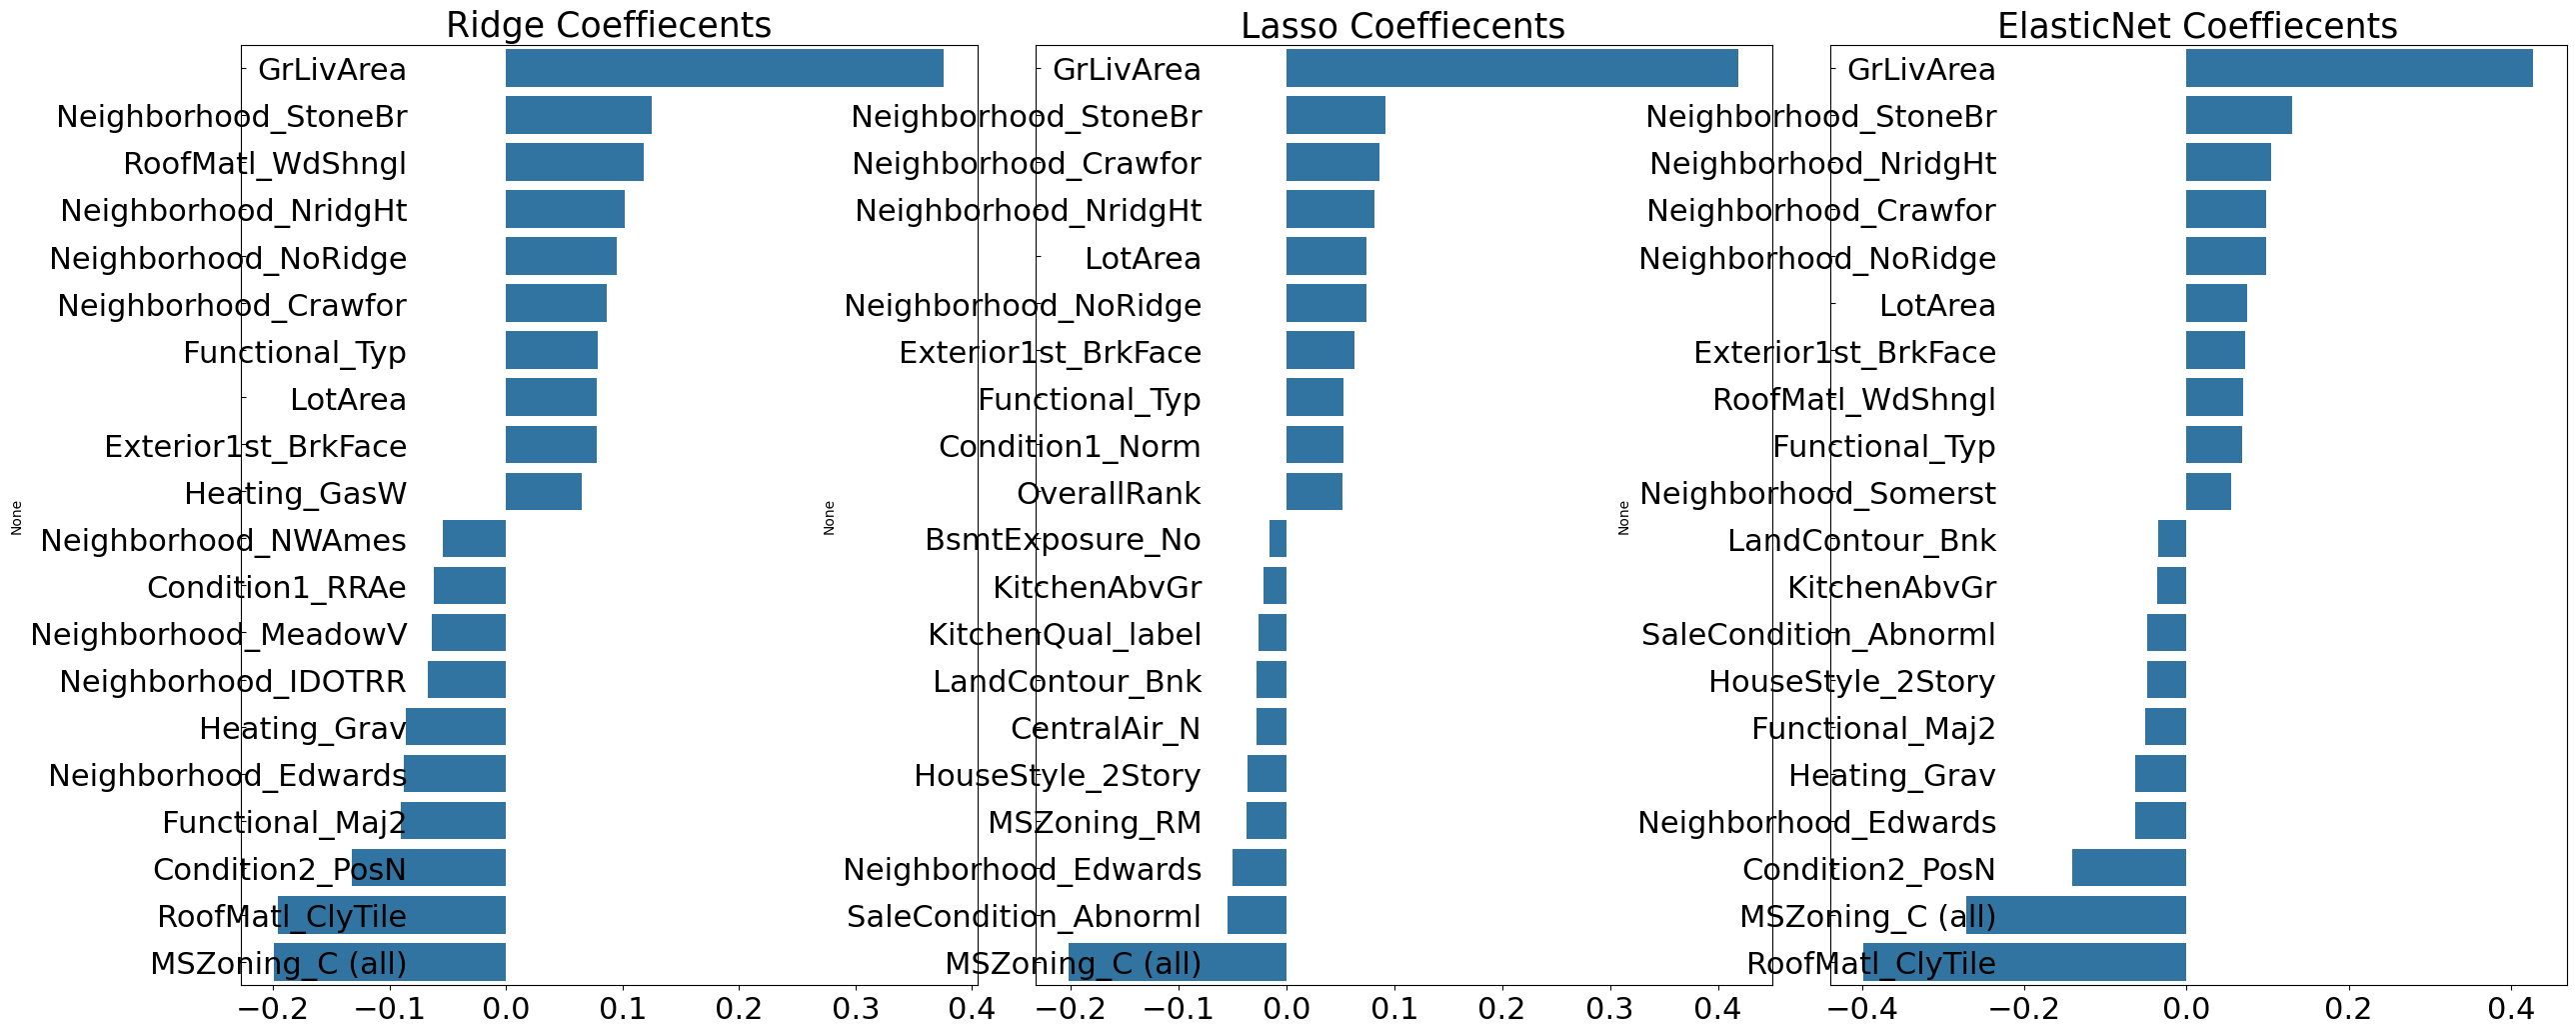

In [109]:
# Checking coef
import matplotlib.pyplot as plt
import seaborn as sns

ridge_estimator = ridge_best.best_estimator_
lasso_estimator = lasso_best.best_estimator_
elastic_estimator = elastic_best.best_estimator_

models = [ridge_estimator, lasso_estimator, elastic_estimator]
visualize_coefficient(models)

Outlier 확인 feature들 : GrLivArea, MSZoning_C(all), RoofMatl_ClyTile

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

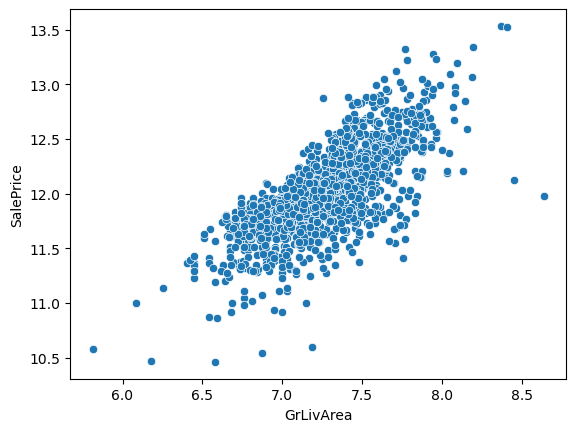

In [110]:
# Checking GrLivArea
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train_df)

In [113]:
# Remove 2 points
cond1 = train_df['GrLivArea'] > 8.25
cond2 = train_df['SalePrice'] < 12.5
outlier_index = train_df[cond1 & cond2].index

train_df.drop(outlier_index, axis = 0, inplace = True)

<Axes: xlabel='MSZoning_C (all)', ylabel='SalePrice'>

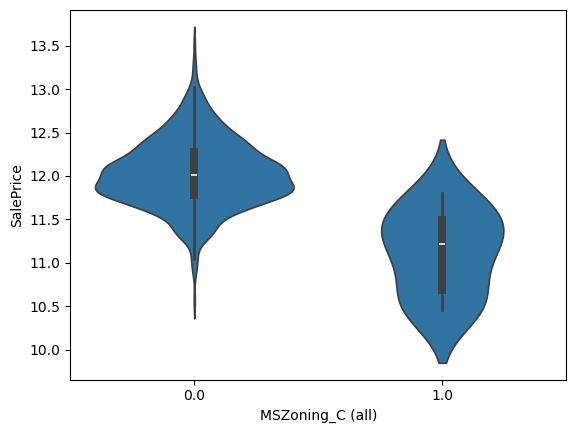

In [125]:
# Checking MSZoning_C (all)
sns.violinplot(x = 'MSZoning_C (all)', y = 'SalePrice', data = train_df)

<Axes: xlabel='RoofMatl_ClyTile', ylabel='SalePrice'>

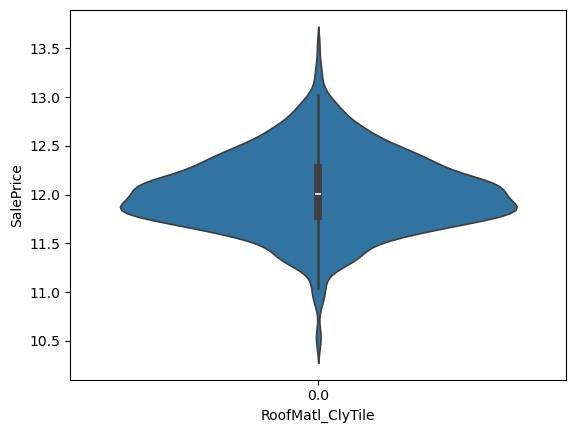

In [126]:
# Checking RoofMatl_ClyTile
sns.violinplot(x = 'RoofMatl_ClyTile', y = 'SalePrice', data = train_df)

In [131]:
test_df.groupby(['RoofMatl_ClyTile']).count()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,BedroomAbvGr,...,SaleCondition_Partial,BsmtFinType1_label,HeatingQC_label,KitchenQual_label,OverallRank,ExterRank,BsmtRank,GarageRank,GroundBath,BsmtBath
RoofMatl_ClyTile,,,,,,,,,,,,,,,,,,,,,
0.0,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459,...,1459,1459,1459,1459,1459,1459,1459,1459,1459,1459


In [132]:
# drop feature
train_df.drop('RoofMatl_ClyTile', axis = 1, inplace = True)
test_df.drop('RoofMatl_ClyTile', axis = 1, inplace = True)

In [133]:
Feature = train_df.drop('SalePrice', axis = 1, inplace = False)
Label = train_df['SalePrice']

In [134]:
from sklearn.model_selection import GridSearchCV

ridge_best = GridSearchCV(ridge_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
lasso_best = GridSearchCV(lasso_model, param_grid = parameter1, scoring = 'neg_root_mean_squared_error', refit = True)
elastic_best = GridSearchCV(elastic_model, param_grid = parameter2, scoring = 'neg_root_mean_squared_error', refit = True)

ridge_best.fit(Feature, Label)
lasso_best.fit(Feature, Label)
elastic_best.fit(Feature, Label)

print("Ridge 모델 최적 파라미터 :", ridge_best.best_params_, " / RSME :", -ridge_best.best_score_)
print("Lasso 모델 최적 파라미터 :", lasso_best.best_params_, " / RSME :", -lasso_best.best_score_)
print("ElasticNet 모델 최적 파라미터 :", elastic_best.best_params_, " / RSME :", -elastic_best.best_score_)

Ridge 모델 최적 파라미터 : {'alpha': 5}  / RSME : 0.11414669833003248
Lasso 모델 최적 파라미터 : {'alpha': 0.001}  / RSME : 0.11446631982009166
ElasticNet 모델 최적 파라미터 : {'alpha': 0.001, 'l1_ratio': 0.3}  / RSME : 0.11279535459014386


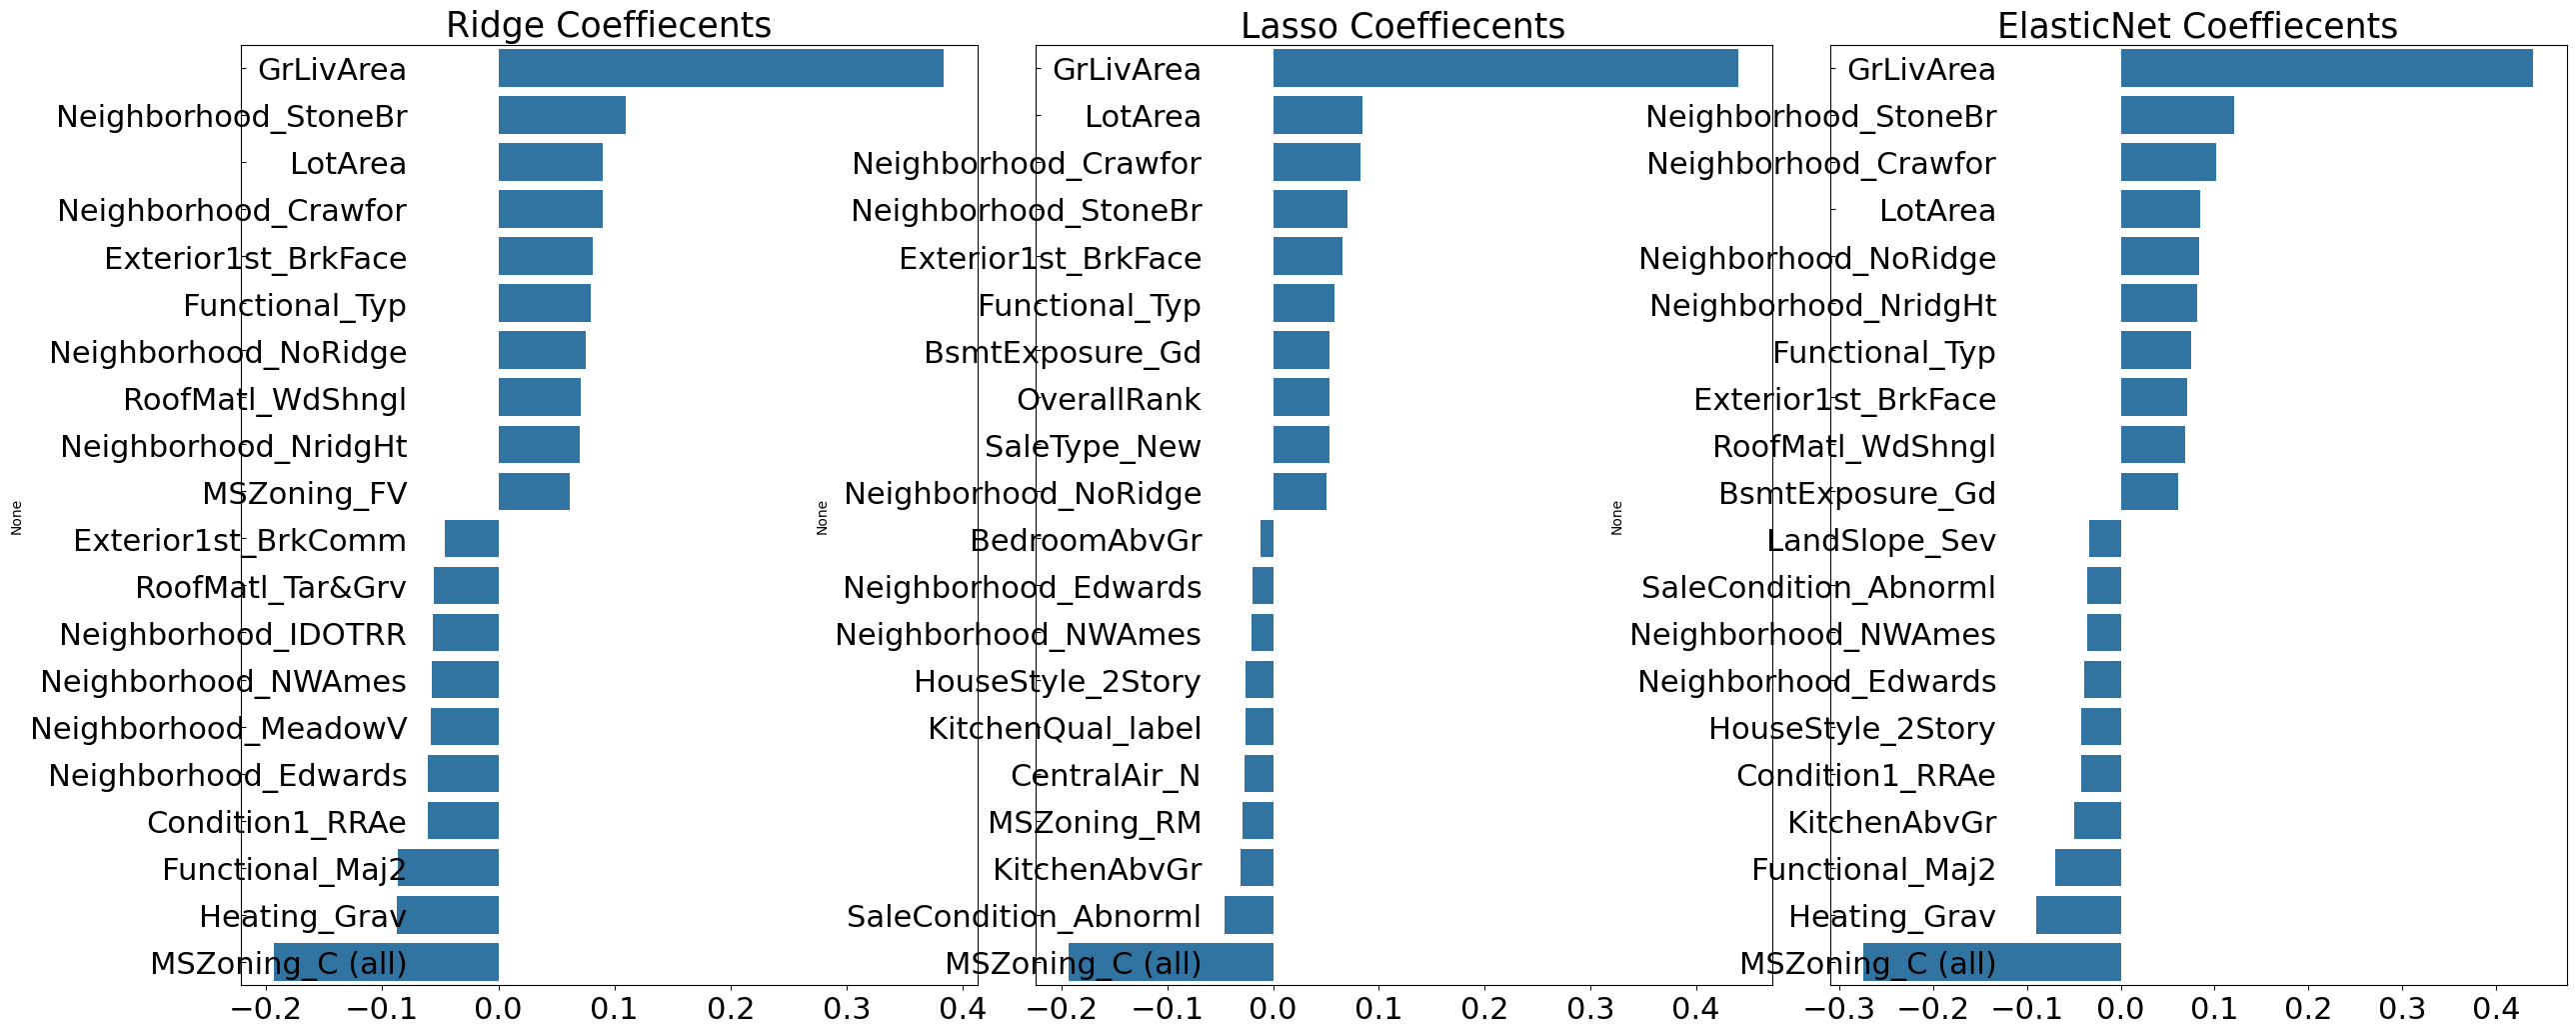

In [135]:
ridge_estimator = ridge_best.best_estimator_
lasso_estimator = lasso_best.best_estimator_
elastic_estimator = elastic_best.best_estimator_

models = [ridge_estimator, lasso_estimator, elastic_estimator]
visualize_coefficient(models)